In [1]:
import numpy as np
from axon_approximation import axon_algorithm
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rcParams.update({"text.usetex": True})

# 1D

In [2]:
xs = np.linspace(0,1, 1000)[:,None]

In [3]:
def plot_errors(data, title):
    plt.plot(np.arange(1,101), data)
    plt.yscale('log')
    plt.ylabel('error')
    plt.xlabel('K')
    plt.title(title)
    plt.xticks(np.arange(0,102, 10))

In [4]:
def plot_basis(data, name):
    plt.figure(figsize=(10,6))
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.ylabel(r'$\phi_{}(x)$'.format(i))
        plt.xlabel(r'$x$')
        if i == 0:
            plt.plot(np.linspace(0,1,1000), np.ones(1000)*data[0,0]) 
            # otherwise the constant function is has strange value
        else:
            plt.plot(np.linspace(0,1,1000), data[:,i])
    plt.tight_layout()

$x^2$

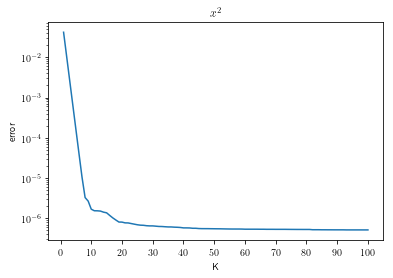

In [6]:
ys = (xs**2).flatten()
bs_x2, bs_coefs, r, coefs, norms, errs_x2 = axon_algorithm(xs, ys, 100)

plot_errors(errs_x2, r'$x^2$')

In [ ]:
plot_basis(bs_x2, r'$x^2$')

$\sqrt{x}$

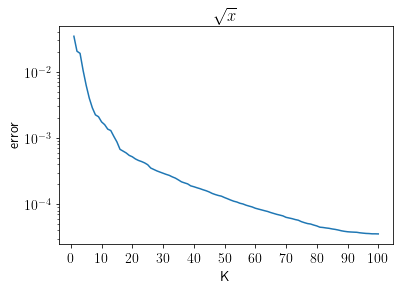

In [29]:
ys = (np.sqrt(xs)).flatten()
bs_sqrt, bs_coefs, r, coefs, norms, errs_sqrt = axon_algorithm(xs, ys, 100)
plot_errors(errs_sqrt, r'$\sqrt{x}$')

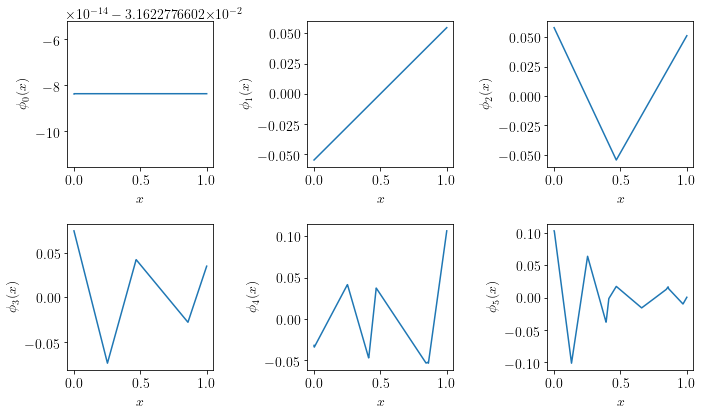

In [30]:
plot_basis(bs_sqrt, r'$\sqrt{x}$')

$\exp(-x)$

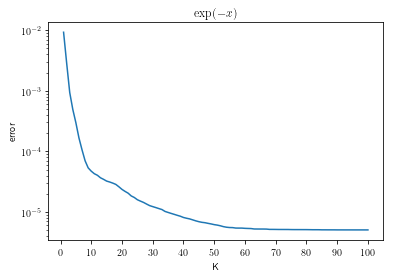

In [7]:
ys = (np.exp(-xs)).flatten()
bs_exp, bs_coefs, r, coefs, norms, errs_exp = axon_algorithm(xs, ys, 100)
plot_errors(errs_exp, r'$\exp(-x)$')

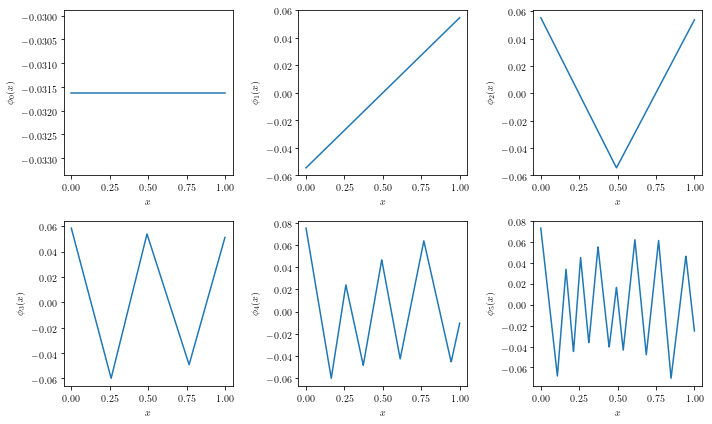

In [9]:
plot_basis(bs_exp, r'$\exp(-x)$')

$\sin(20x)$

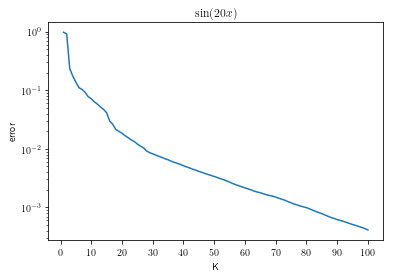

In [11]:
ys = (np.sin(20*xs)).flatten()
bs_sin, bs_coefs, r, coefs, norms, errs_sin = axon_algorithm(xs, ys, 100)
plot_errors(errs_sin, r'$\sin(20x)$')

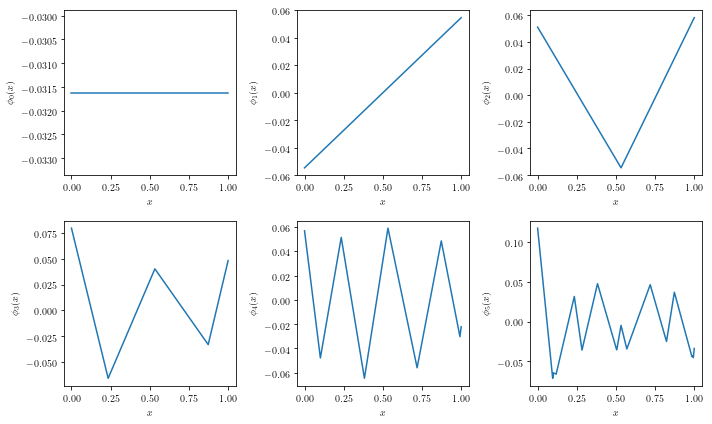

In [12]:
plot_basis(bs_sin, r'$\sin(20x)$')

$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0$

In [14]:
# we found solution analytically
def u(x, eps=0.05):
    a = (1-np.exp(1/eps))/(np.exp(2/eps)-1)
    b = (np.exp(1/eps)-np.exp(2/eps))/(np.exp(2/eps)-1)
    return a*np.exp(x/eps)+b*np.exp(-x/eps) + 1

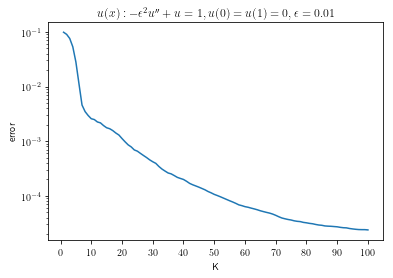

In [15]:
eps = 0.01
ys = u(xs, eps)
bs_001, bs_coefs, r, coefs, norms, errs_001 = axon_algorithm(xs, ys, 100)
plot_errors(errs_001, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

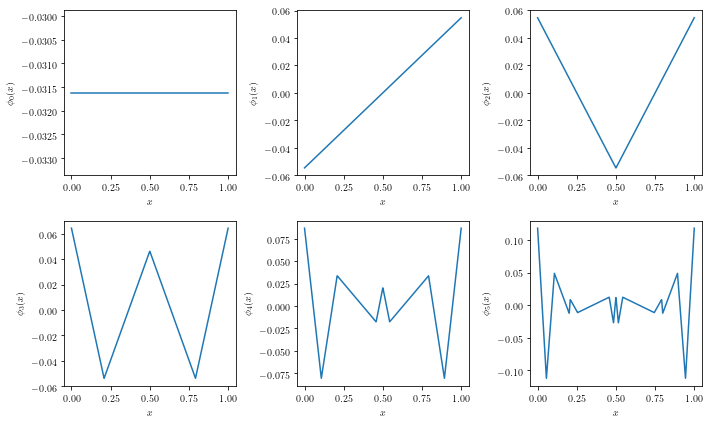

In [16]:
plot_basis(bs_001, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

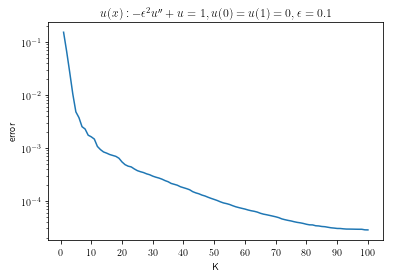

In [17]:
eps = 0.1
ys = u(xs, eps)
bs_01, bs_coefs, r, coefs, norms, errs_01 = axon_algorithm(xs, ys, 100)
plot_errors(errs_01, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

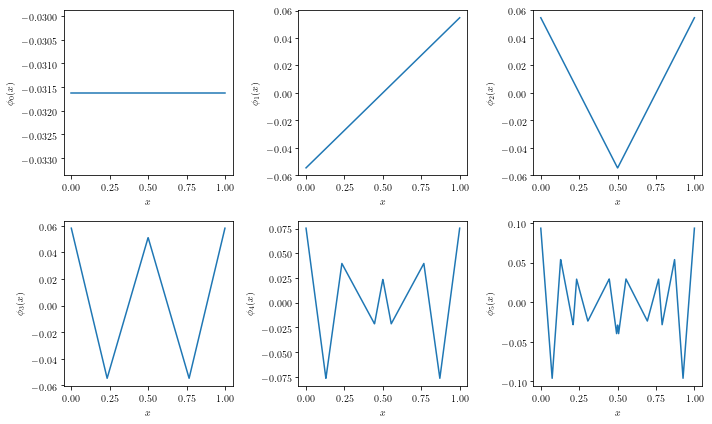

In [18]:
plot_basis(bs_01, r"$u(x): -\epsilon^2u''+u = 1, u(0)=u(1)=0, \epsilon={}$".format(eps))

# 2D

$x^2+y^2$

In [19]:
def f(x):
    return np.sqrt(xs[:,0]**2+xs[:,1]**2).astype(np.float64)

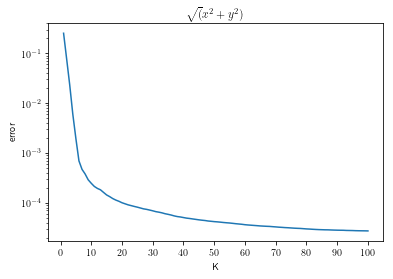

In [20]:
x = np.linspace(-1,1,100)
xx, yy = np.meshgrid(x,x)
xs = np.hstack([xx.flatten()[:,np.newaxis], yy.flatten()[:,np.newaxis]])
ys = f(xs)
bs_2d, bs_coefs, r, coefs, norms, errs_2d = axon_algorithm(xs, ys, 100)
plot_errors(errs_2d, r'$\sqrt(x^2+y^2)$')

NameError: name 'bs' is not defined

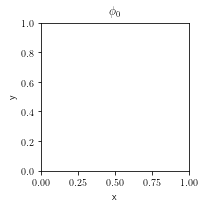

In [21]:
plt.figure(figsize=(9,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title(r'$\phi_{}$'.format(i))
    plt.ylabel(r'$\phi_{}$(x)'.format(i))
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.contourf(xx, yy, bs[:,i].reshape(100,100))
plt.tight_layout()